<a href="https://colab.research.google.com/github/Epilef86/DNC/blob/main/Clusteriza%C3%A7%C3%A3o_MeanShift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

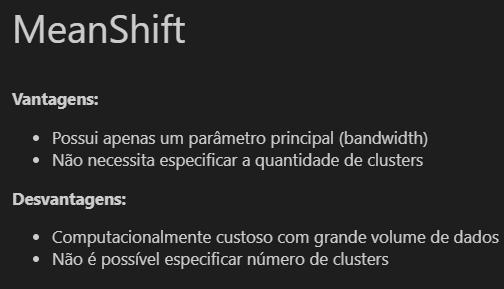

Outro algoritmo de densidade é o Meanshift, ele utiliza um centróide, ou seja, tem uma certa semelhança com KMeans

Características:

1- Requer dados numéricos, contínuos na mesma escala;
2- Requer apenas 1 parâmetro obrigatório: bandwith;

Outras vantagens:

1- Capaz de identificar clusters em diferentes formatos;
2- Robusto a outliers;


Desvantagens:

1- Não adequado para datasets grandes

Os pontos tendem a ir pra região onde tem maior densidade, e isso se torna o centróide

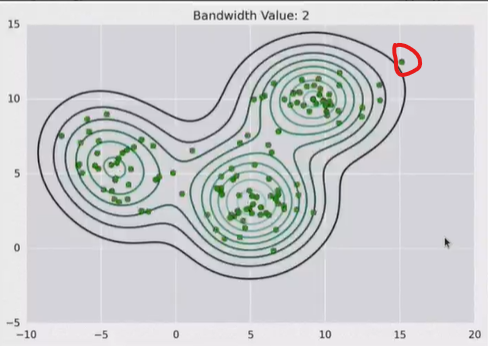

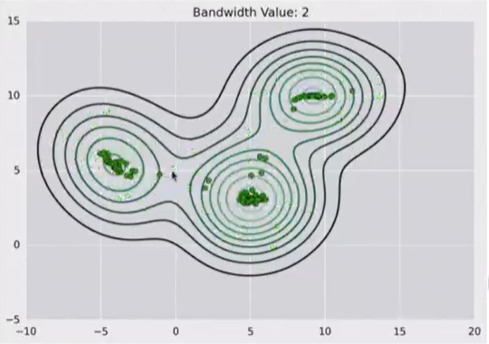

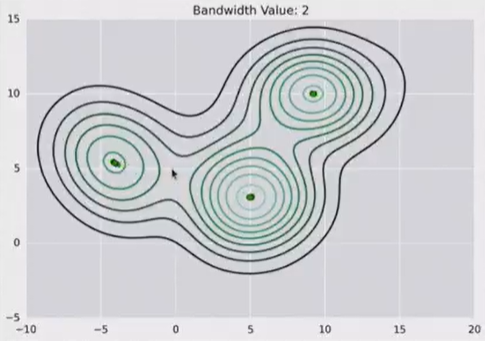

Apenas um parâmetro que controlamento que é o tamanho do raio

PRÁTICA

In [2]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Didatic purposes
import string
from ipywidgets import interact

In [3]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

1 mil amostras, 2 clounas, 4 centros, desvio padrão 0.8

In [4]:
# Simulate clusters
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(1E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-2.256086,7.858356
1,0.568548,3.953328
2,-2.602152,8.418937
3,-2.625338,2.063689
4,2.286564,1.227960


A lógica do MeanShift é encontrar as regiões bem densas e o centróide vai caminhando pra essas direções. Ou seja, se tem 3 regiões de alta densidade, vão ser 3 centróides 

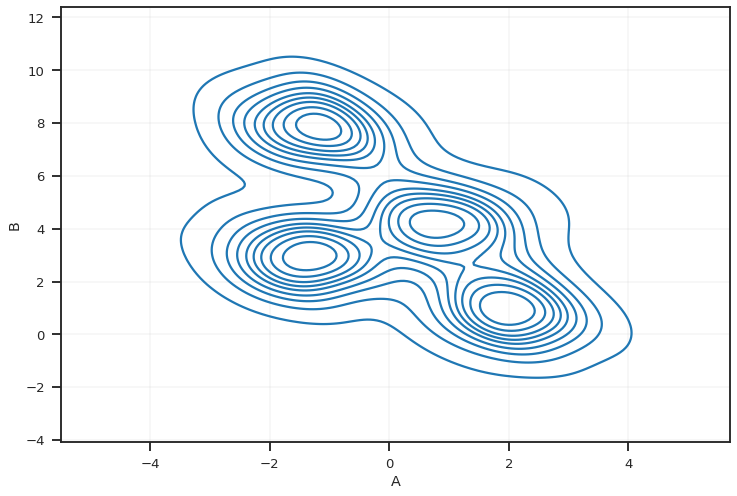

In [5]:
# Density plot
sns.kdeplot(data=df, x='A', y='B');

Vemos que temos 4 principais grupos de densidade, provavelmente se nessas regiões que os centróides devem parar. 

O MeanShith assim KMeans, DBSCAN, tenta essa abordagem via classe ou via função

Vamos utilizar a abordagem via classe

O default é none, se for none ele vai calcular. Nesse caso não precisamos passar diretamente um valor. 

In [6]:
# Model & labels
model = MeanShift()
labels = model.fit_predict(X)

In [7]:
# Estimating bandwidth
estimate_bandwidth(X)

2.822735629625506

Ele vai passar esse valor acima, caso não coloquemos nenhum valor 

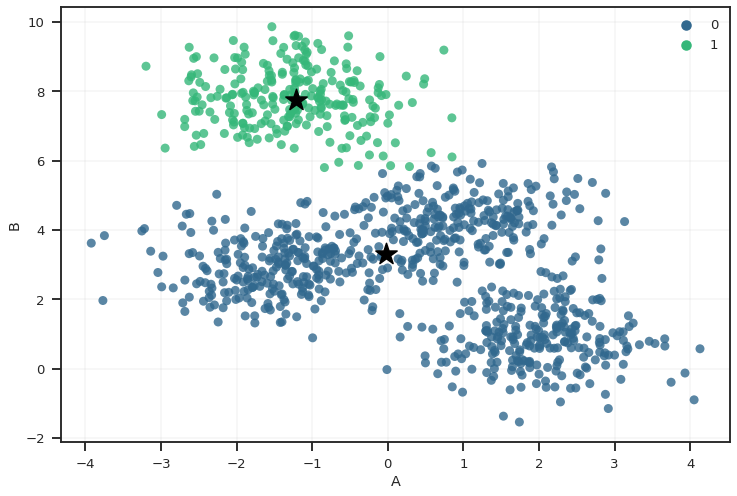

In [8]:
# Plot
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
ax.scatter(*model.cluster_centers_.T, marker='*', c='black', s=500)
plt.show()

Foi identificado dois grandes grupos.

In [9]:
@interact(bandwidth=(0.1, 3, 0.01))
def custom_meanshift(bandwidth):
  model = MeanShift(bandwidth=bandwidth, cluster_all=True)
  labels = model.fit_predict(X)
  ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
  ax.scatter(*model.cluster_centers_.T, marker='*', c='black', s=500)
  plt.show()

interactive(children=(FloatSlider(value=1.55, description='bandwidth', max=3.0, min=0.1, step=0.01), Output())…

  Com bandwith que é o raio de 1.55 temos 3 resultados, ou seja, se eu diminuir mais o raio mais cluster vão surgindo 

Se eu considerar cluster_all=False, ele vai desprezar os outliers na análise. Se isso for interessante do ponto de vista do negócio, ótimo.